<a href="https://colab.research.google.com/github/lynn-nglinyu/Portfolio/blob/main/Preject_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA EXPLORATION**

We load the first dataset on Student Depression from Kaggle to begin exploration.

In [ ]:
import kagglehub
adilshamim8_student_depression_dataset_path = kagglehub.dataset_download('adilshamim8/student-depression-dataset')

In [ ]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

# objects are strings. they are not shown using the describe function.
# Objects are: Gender, City, profession, sleep duration, diet, degree, sucidal thoughts, fam hist, financial stress.
# int are running numerical variables.
# There are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


# **DATA CLEANING**

**1. We begin data cleaning by doing a check for duplicates.**

In [ ]:
df[df.duplicated()].sum()

# There are no duplicate values in the dataset

,0
id,0
Gender,0
Age,0.0
City,0
Profession,0
Academic Pressure,0.0
Work Pressure,0.0
CGPA,0.0
Study Satisfaction,0.0
Job Satisfaction,0.0


**2. Some Column titles are confusing and long, so we rename them for clarity**

In [ ]:
df = df.rename(columns = lambda x: x.replace("Have you ever had suicidal thoughts ?", "Suicidal Thoughts"))
df = df.rename(columns = lambda x: x.replace("Family History of Mental Illness", "Family History"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27901 non-null  int64  
 1   Gender              27901 non-null  object 
 2   Age                 27901 non-null  float64
 3   City                27901 non-null  object 
 4   Profession          27901 non-null  object 
 5   Academic Pressure   27901 non-null  float64
 6   Work Pressure       27901 non-null  float64
 7   CGPA                27901 non-null  float64
 8   Study Satisfaction  27901 non-null  float64
 9   Job Satisfaction    27901 non-null  float64
 10  Sleep Duration      27901 non-null  object 
 11  Dietary Habits      27901 non-null  object 
 12  Degree              27901 non-null  object 
 13  Suicidal Thoughts   27901 non-null  object 
 14  Work/Study Hours    27901 non-null  float64
 15  Financial Stress    27901 non-null  object 
 16  Fami

**3. Note that "Suicidal Thoughts" and "Family History" are strings instead of boolean. Thus we convert them to Bool.**

In [ ]:
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].map({"Yes":True, "No":False}).fillna(False)
df['Suicidal Thoughts']

,Suicidal Thoughts
0,True
1,False
2,False
3,True
4,True
...,...
27896,True
27897,False
27898,False
27899,True


In [ ]:
df['Family History'] = df['Family History'].map({"Yes":True, "No":False}).fillna(False)
df['Family History']

,Family History
0,False
1,True
2,True
3,True
4,False
...,...
27896,True
27897,True
27898,False
27899,False


**4. Note that max('Age') is 59. Check if it could be an outlier**

In [ ]:
df_age = df.sort_values(by="Age", ascending = False)
df_age.head(5)

# Several student aged above 50 with valid data. -> Not an outlier.
# Notice here there is a degree program called 'Class 12'.

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
9238,46602,Male,59.0,Nashik,Student,1.0,0.0,8.14,1.0,0.0,'5-6 hours',Unhealthy,PhD,True,10.0,4.0,True,0
2909,14768,Female,58.0,Chennai,Student,4.0,0.0,8.58,1.0,0.0,'7-8 hours',Healthy,'Class 12',False,4.0,4.0,False,0
14819,74887,Female,56.0,Ludhiana,Student,3.0,0.0,7.94,5.0,0.0,'5-6 hours',Unhealthy,BSc,False,1.0,5.0,True,0
13499,68441,Male,54.0,Agra,Student,5.0,0.0,9.60,2.0,0.0,'More than 8 hours',Unhealthy,B.Ed,True,9.0,3.0,True,0
4386,22004,Female,51.0,Bhopal,Student,2.0,0.0,8.26,3.0,0.0,'Less than 5 hours',Moderate,MBBS,True,5.0,5.0,True,0


**5. Note that there is a Degree called 'Class 12'. It was unclear, thus we rename it.**

In [ ]:
df = df.replace("'Class 12'", "High School")
df['Degree'].value_counts()

# We learn that 'Class 12' which is understood as High School Diploma.
# So, 'Degree' means highest qualification held.

,count
Degree,
High School,6080
B.Ed,1867
B.Com,1506
B.Arch,1478
BCA,1433
MSc,1190
B.Tech,1152
MCA,1044
M.Tech,1022


**6. Note there are 'Others' in 'Sleep Duration'. Unknown information that cannot be used for analysis, hence we filter them out.**

In [ ]:
df = df[df['Sleep Duration']!="Others"]
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044


**7. Note there is a value "?" which has 3 counts in the Financial Stress.**



In [ ]:
df['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6712
4.0,5773
3.0,5222
1.0,5116
2.0,5057
?,3


In [ ]:
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df = df.dropna(subset=['Financial Stress'])
df['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6712
4.0,5773
3.0,5222
1.0,5116
2.0,5057


# **DATA TRANSFORMATION**

**1. CATEGORIZATIONS**

*1.1. Categorizing 'Professions' into 'Students' and 'Working Professionals'*

In [ ]:
def categorize_profession(profession):
    if profession.strip().lower() == 'student':
        return 'Student'
    else:
        return 'Worker'
df['Profession Category'] = df['Profession'].apply(categorize_profession)
df[['Profession', 'Profession Category']].head(10)

,Profession,Profession Category
0,Student,Student
1,Student,Student
2,Student,Student
3,Student,Student
4,Student,Student
5,Student,Student
6,Student,Student
7,Student,Student
8,Student,Student
9,Student,Student


In [ ]:
df['Profession Category'].value_counts()
df = df[df['Profession Category'] != "Worker"]
df['Profession Category'].value_counts()

# Since we are only studying Students, we drop the "Worker" from df

,count
Profession Category,
Student,27849
Worker,31


*1.2. Categorizing 'Degree' into 'PhD', 'Masters', 'Bachelors', and 'High School'*

In [ ]:
def categorize_Degree(Degree):
    Degree = Degree.strip()
    if Degree == 'High School':
        return 'High School'
    elif Degree in ['B.Ed', 'B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc', 'B.Pharm', 'BBA', 'MBBS', 'BE', 'BA', 'LLB']:
        return "Bachelor"
    elif Degree in ['MSC', 'MCA', 'M.Tech', 'M.Ed', 'M.Com', 'M.Pharm', 'MBA', 'MA', 'LLM', 'MHM', 'ME', 'MD']:
        return "Master"
    elif Degree == 'PhD':
        return 'Doctorate'
    else:
        return 'Other'

df['Degree Category'] = df['Degree'].apply(categorize_Degree)
df['Degree Category'].value_counts()

,count
Degree Category,
Bachelor,13306
Master,6724
High School,6080
Other,1220
Doctorate,519


**2. JOINS**

To import another dataset on Indian Districts Census from 2011 to JOIN population data with student depression.

In [ ]:
path = kagglehub.dataset_download("shiivvvaam/indian-districts-population-data")
df2 = pd.read_csv("/kaggle/input/indian-districts-population-data/census2011.csv")
df2.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


After a rename of the column, we JOIN the datasets using the LEFT JOIN, because there are irrelevant data from Census2011.

In [ ]:
df2 = df2.rename(columns = lambda x: x.replace("District", "City"))
df_left = pd.merge(df, df2, on = 'City', how = 'left')
df_left.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Depression,Profession Category,German CGPA Category,Degree Category,Ranking,State,Population,Growth,Sex-Ratio,Literacy
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,1,Student,1.0,Bachelor,44.0,Andhra Pradesh,"4,290,589",11.96 %,1006.0,66.91
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,0,Student,3.0,Bachelor,3.0,Karnataka,"9,621,551",47.18 %,916.0,87.67
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,0,Student,2.0,Bachelor,388.0,Jammu and Kashmir,"1,236,829",20.35 %,900.0,69.41
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,1,Student,3.0,Bachelor,75.0,Uttar Pradesh,"3,676,841",17.15 %,913.0,75.60
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,0,Student,2.0,Master,10.0,Rajasthan,"6,626,178",26.19 %,910.0,75.51


We now work with the merged dataframe.
Here, we try to identify the null data where df['City'] did not JOIN with df2['City'].

In [ ]:
df_nullcities = df_left.loc[df_left['Population'].isnull() == True]
df_nullcities['City'].value_counts()

,count
City,
Kalyan,1563
Vasai-Virar,1288
Ahmedabad,948
Delhi,765
Mumbai,697
Kanpur,606
Saanvi,2
Bhavna,2
City,2


We note that some are sub-districts and thus make the necessary edits to df and rejoin the tables:

1. df['Kalyan'] is df2['Thane'],
2. df['Vasai-Virar'] is df2['Thane'] because 'Palghar' did not exist until 2014 (Census is from 2011),
3. df['Ahmedabad'] is df2['Ahmadabad'],
4. df['Mumbai'] is df2['Mumbai City'],
5. df['Delhi'] is df2['New Delhi'],
6. df['Kanpur'] is df2['Kanpur Nagar'],
7. df['Khaziabad'] is df2['Ghaziabad'].


In [ ]:
df = df.replace({
    "Kalyan": "Thane",
    "Vasai-Virar": "Thane",
    "Ahmedabad": "Ahmadabad",
    "Mumbai": "Mumbai City",
    "Delhi": "New Delhi",
    "Kanpur": "Kanpur Nagar",
    "Khaziabad": "Ghaziabad"
})

After re-running the LEFT JOIN on df1 and df2, we confirm that the remaining null-values are independent answers with errors in City input.

In [ ]:
df_left = pd.merge(df, df2, on = 'City', how = 'left')
df_nullcities = df_left.loc[df_left['Population'].isnull() == True]
df_nullcities['City'].info()

# There are 25 NA errors for df_left.
# These NULLS are input errors from df that can be dropped.

<class 'pandas.core.series.Series'>
Index: 25 entries, 4433 to 26267
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
25 non-null     object
dtypes: object(1)
memory usage: 400.0+ bytes


In [ ]:
# To remove the irrelevant data from df_left:

df3 = df_left[~df_left['City'].isin(df_nullcities['City'])]
df3['City'].value_counts()

,count
City,
Thane,3990
Srinagar,1370
Hyderabad,1337
Lucknow,1155
Ludhiana,1107
Agra,1091
Surat,1078
Kolkata,1065
Jaipur,1034


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27824 entries, 0 to 27848
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27824 non-null  int64  
 1   Gender                27824 non-null  object 
 2   Age                   27824 non-null  float64
 3   City                  27824 non-null  object 
 4   Profession            27824 non-null  object 
 5   Academic Pressure     27824 non-null  float64
 6   Work Pressure         27824 non-null  float64
 7   CGPA                  27824 non-null  float64
 8   Study Satisfaction    27824 non-null  float64
 9   Job Satisfaction      27824 non-null  float64
 10  Sleep Duration        27824 non-null  object 
 11  Dietary Habits        27824 non-null  object 
 12  Degree                27824 non-null  object 
 13  Suicidal Thoughts     27824 non-null  bool   
 14  Work/Study Hours      27824 non-null  float64
 15  Financial Stress      27

# **DATA ANALYSIS**

:::**1. To find correlation between 'Suicidal Thoughts' and 'Depression'**

In [ ]:
selected = df[["Depression", "Suicidal Thoughts"]]  # replace with your actual column names

# Compute the correlation matrix
correlation_matrix = selected.corr()

# Display it
print(correlation_matrix)

                   Depression  Suicidal Thoughts
Depression           1.000000           0.546432
Suicidal Thoughts    0.546432           1.000000


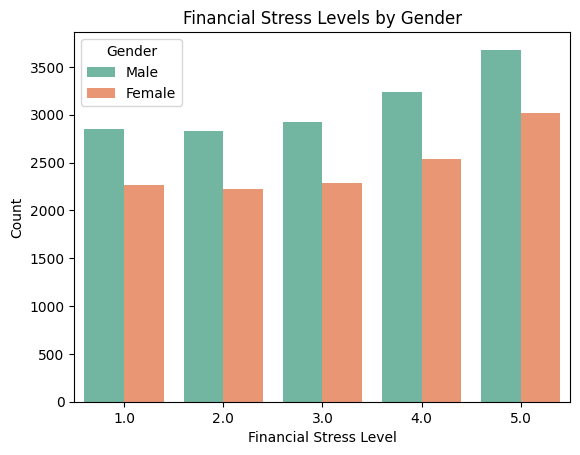

In [ ]:
df_sorted = df.sort_values(by='Financial Stress', ascending=True)
# We sorted this so that FInancial Stress would be in ascending order

sns.countplot(x='Financial Stress', hue='Gender', data=df_sorted, palette='Set2')
plt.title('Financial Stress Levels by Gender')
plt.xlabel('Financial Stress Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#FINDINGS: Males have higher financial stress levels than females.

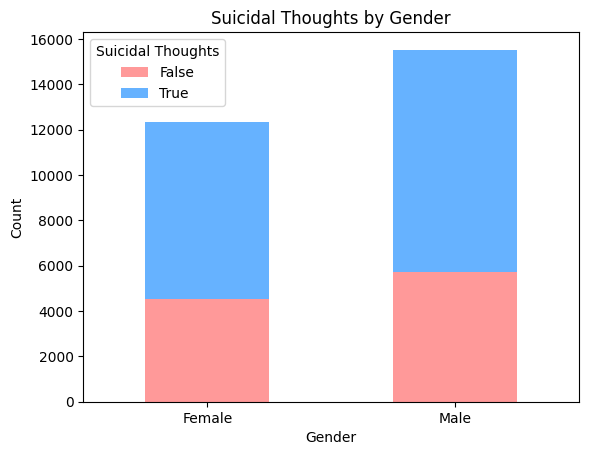

In [ ]:
pd.crosstab(df['Gender'], df['Suicidal Thoughts']).plot(kind='bar', stacked=True, color=['#FF9999','#66B2FF'])
plt.title('Suicidal Thoughts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#stacked bar chart to compare categorical variables.
#FINDINGS: Male gender has higher incidence of suicidal thoughts

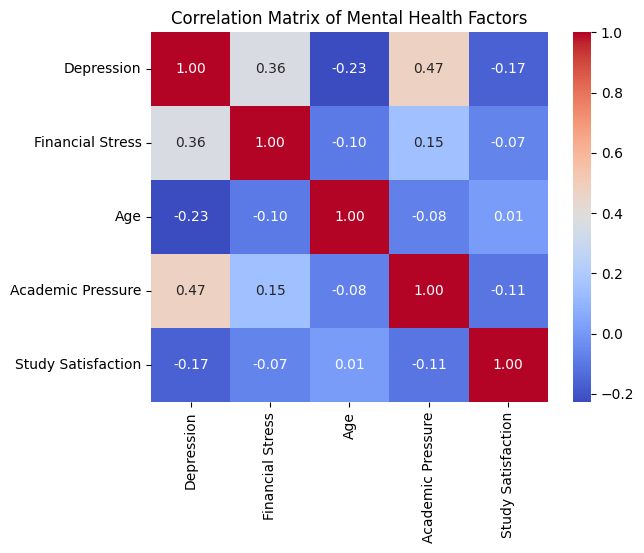

In [ ]:
# here we check the correlation among mental health variables with depression.
#we can talk about and decide to drop which variables have to negligible association with depression.
mental_health_vars = ['Depression', 'Financial Stress', 'Age', 'Academic Pressure', 'Study Satisfaction']

corr = df[mental_health_vars].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Mental Health Factors')
plt.show()

#FINDINGS:
#Financial stress has a positive relation with being depressed (higher financial stress correlates with being depressed).
#Age  has a negative relation with being depressed (older persons are more depressed than counterparts).
#Academic pressure has a negative relation with being depressed (more academic stress associates with being depression).
#Study satisfaction has a negative relation with being depressed (if you are satisfied with your study, then lower depression chances).

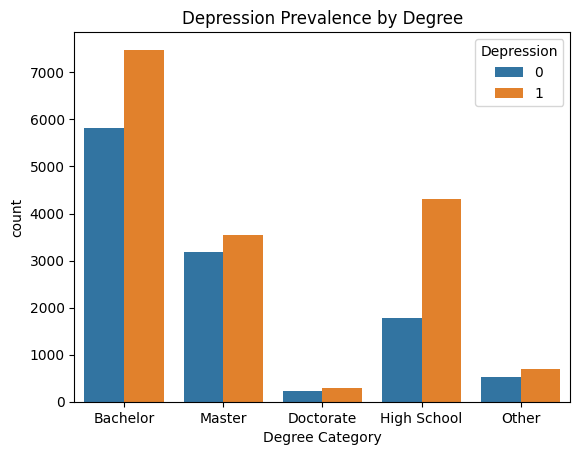

In [ ]:
sns.countplot(x='Degree Category', hue='Depression', data=df)
plt.title('Depression Prevalence by Degree')
plt.xticks
plt.show()

#FINDINGS: Depression is more prevalent among Bsc holders.
#However, achieving higher academic qualification reduces the prevalence of depression.

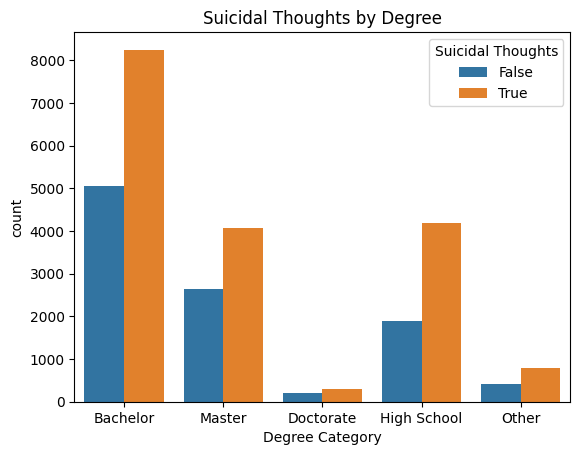

In [ ]:
sns.countplot(x='Degree Category', hue='Suicidal Thoughts', data=df)
plt.title('Suicidal Thoughts by Degree')
plt.xticks
plt.show()

#FINDINGS: Suicidal thoughts is more prevalent among Bsc holders.
#However, achieving higher academic qualification reduces the prevalence of suicidal thoughts.

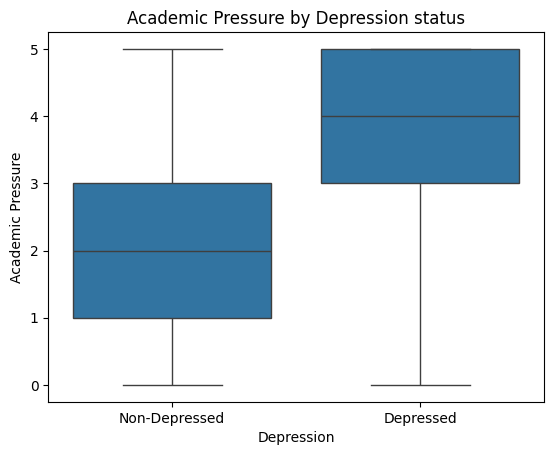

In [ ]:
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
plt.title('Academic Pressure by Depression status')
plt.xticks([0, 1], ['Non-Depressed', 'Depressed'])
plt.show()

#FINDINGS: Depressed students experience higher academic pressure than their counterparts.

**Now we analyzed the joined df3 to relate 'Depression' with 'Population' and 'Growth'**

In [ ]:
# There are existing problems with commas in df3['Population'] that needs cleaning.
## After cleaning, plot can read 'Population' as numeric and calculate mean.

df3['Population'] = df3['Population'].str.replace(',', '')
df3['Population'] = pd.to_numeric(df3['Population'], errors='coerce')

<ipython-input-47-8c0045c8b79c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Population'] = df3['Population'].str.replace(',', '')
<ipython-input-47-8c0045c8b79c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Population'] = pd.to_numeric(df3['Population'], errors='coerce')


In [ ]:
# We have to do the same cleaning with 'Growth'
df3['Growth'] = df3['Growth'].str.replace('%', '')
df3['Growth'] = pd.to_numeric(df3['Growth'], errors='coerce')

<ipython-input-31-b4c59047257b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Growth'] = df3['Growth'].str.replace('%', '')
<ipython-input-31-b4c59047257b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Growth'] = pd.to_numeric(df3['Growth'], errors='coerce')


In [ ]:
population_depression = df3.groupby('City').agg({
    'Depression': 'mean',
    'Population': 'mean'
}).reset_index()

# To include labels into the plot, we have to first identify the min/max of cities and depression rate
df3_largestcity = population_depression.loc[population_depression['Population'].idxmax()]
df3_smallestcity = population_depression.loc[population_depression['Population'].idxmin()]
df3_highestdepression = population_depression.loc[population_depression['Depression'].idxmax()]
df3_lowestdepression = population_depression.loc[population_depression['Depression'].idxmin()]

,1
City,Ahmadabad
Depression,0.672996
Population,7214225.0


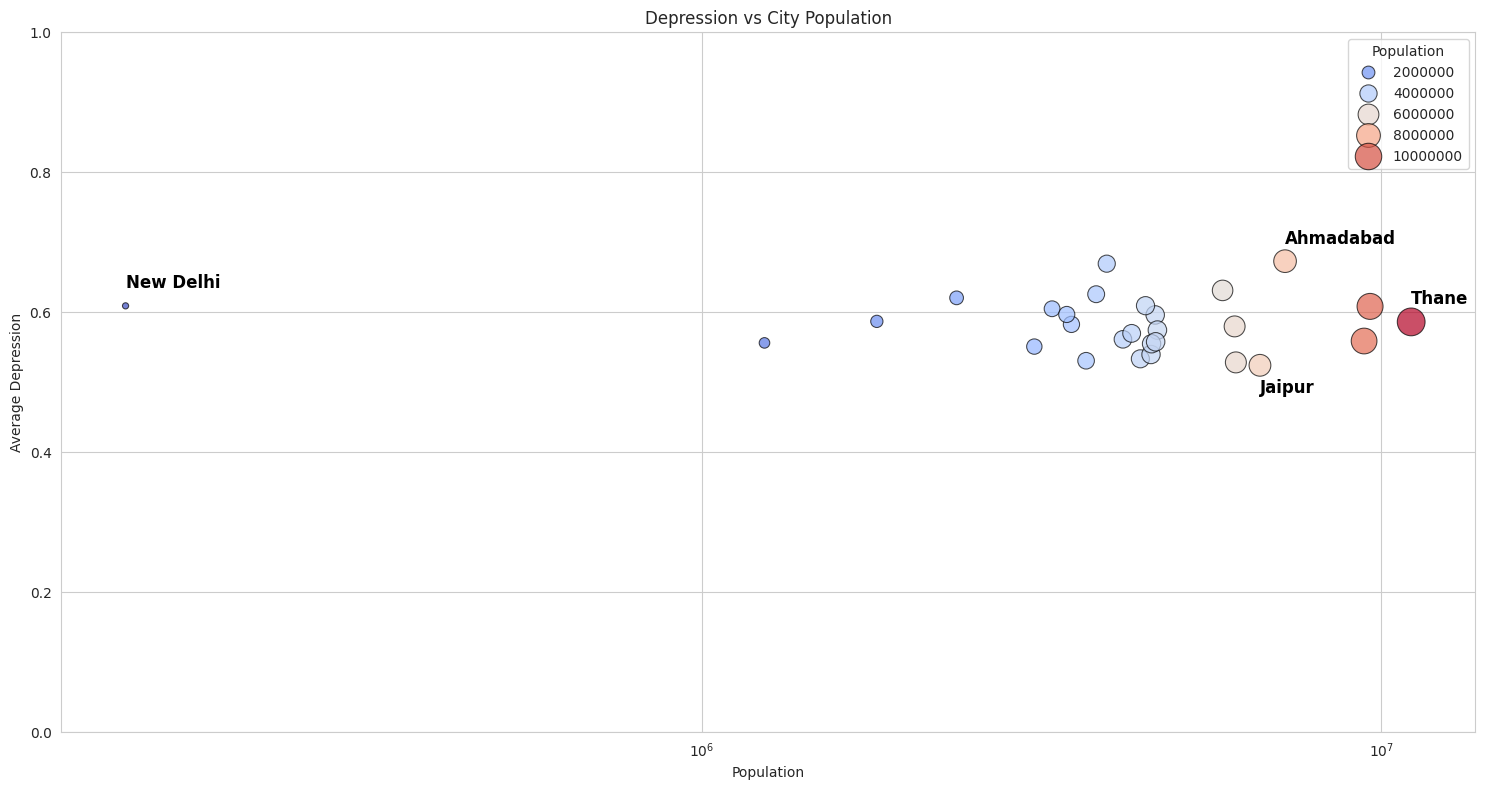

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

sns.scatterplot(
    data=population_depression,
    x='Population',
    y='Depression',
    size='Population',
    hue='Population',
    sizes=(20, 400),
    palette='coolwarm',
    alpha=0.7,
    edgecolor='k'
)

# We wanted to add the names of the cities into the plot:
offset = 0.025
offset2 = -0.04

plt.text(df3_largestcity['Population'],
         df3_largestcity['Depression'] + offset,
         df3_largestcity['City'],
         fontsize=12, weight='bold',
         color='black')

plt.text(df3_smallestcity['Population'],
         df3_smallestcity['Depression'] + offset,
         df3_smallestcity['City'],
         fontsize=12, weight='bold', color='black')

plt.text(df3_highestdepression['Population'],
         df3_highestdepression['Depression'] + offset,
         df3_highestdepression['City'],
         fontsize=12, weight='bold', color='black')

plt.text(df3_lowestdepression['Population'],
         df3_lowestdepression['Depression'] + offset2,
         df3_lowestdepression['City'],
         fontsize=12, weight='bold', color='black')

plt.xlabel('Population')
plt.ylabel('Average Depression')
plt.title('Depression vs City Population')
plt.ylim(0, 1)
plt.xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# We repeat the same procedure for 'Growth'

population_depression = df3.groupby('City').agg({
    'Depression': 'mean',
    'Growth': 'mean'
}).reset_index()

# To include labels into the plot, we have to first identify the min/max of cities and depression rate
df3_largestgrowth = population_depression.loc[population_depression['Growth'].idxmax()]
df3_smallestgrowth = population_depression.loc[population_depression['Growth'].idxmin()]
df3_highestdepression = population_depression.loc[population_depression['Depression'].idxmax()]
df3_lowestdepression = population_depression.loc[population_depression['Depression'].idxmin()]
df3_largestgrowth

,2
City,Bangalore
Depression,0.608355
Growth,47.18


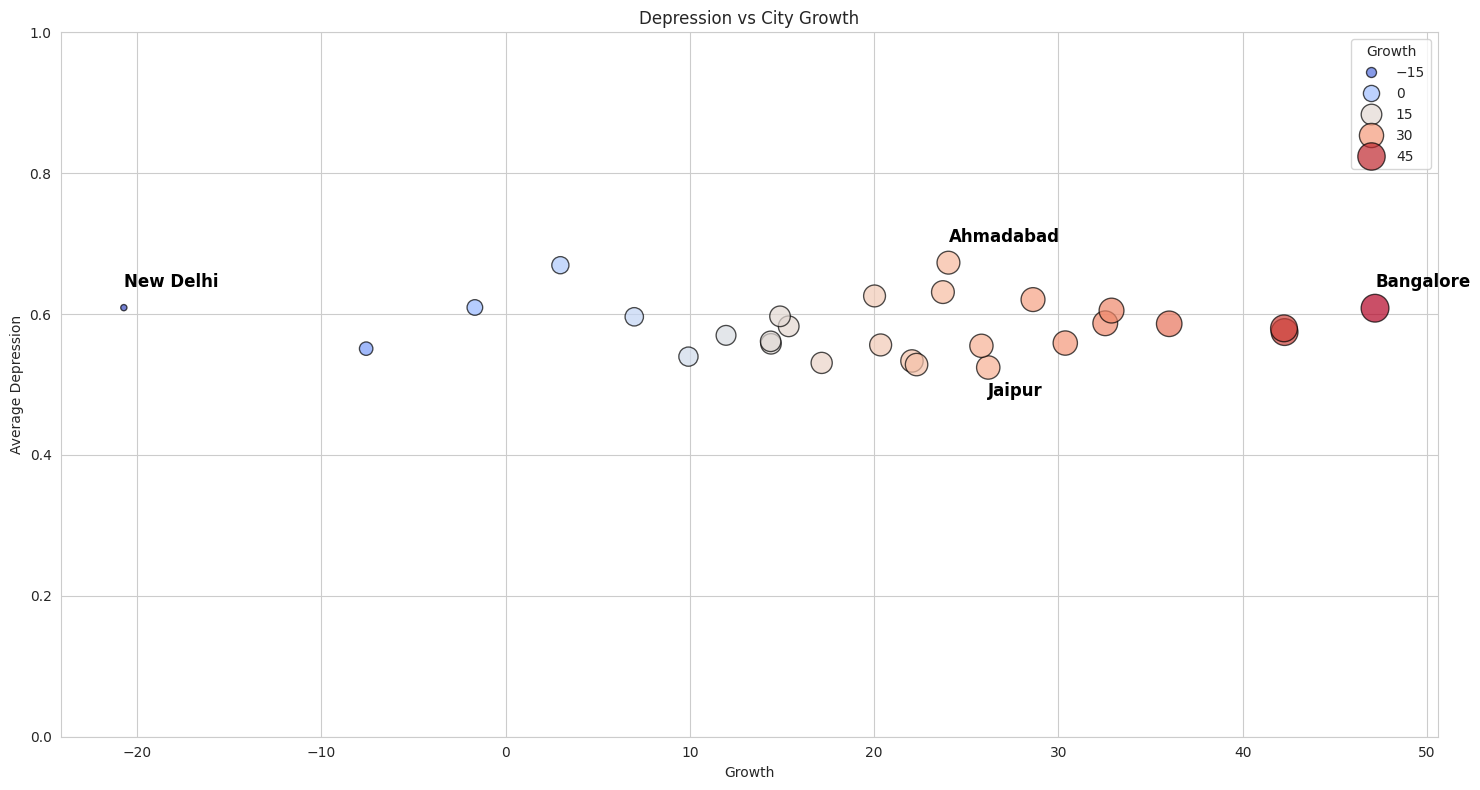

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

sns.scatterplot(
    data=population_depression,
    x='Growth',
    y='Depression',
    size='Growth',
    hue='Growth',
    sizes=(20, 400),
    palette='coolwarm',
    alpha=0.7,
    edgecolor='k'
)
offset = 0.03
offset2 = -0.04

plt.text(df3_largestgrowth['Growth'],
         df3_largestgrowth['Depression'] + offset,
         df3_largestgrowth['City'],
         fontsize=12, weight='bold',
         color='black')

plt.text(df3_smallestgrowth['Growth'],
         df3_smallestgrowth['Depression'] + offset,
         df3_smallestgrowth['City'],
         fontsize=12, weight='bold', color='black')

plt.text(df3_highestdepression['Growth'],
         df3_highestdepression['Depression'] + offset,
         df3_highestdepression['City'],
         fontsize=12, weight='bold', color='black')

plt.text(df3_lowestdepression['Growth'],
         df3_lowestdepression['Depression'] + offset2,
         df3_lowestdepression['City'],
         fontsize=12, weight='bold', color='black')

plt.xlabel('Growth')
plt.ylabel('Average Depression')
plt.title('Depression vs City Growth')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()